In [6]:
import cv2

* 비디오 캡처와 화면 표시(동영상 파일)

In [13]:
cap = cv2.VideoCapture('./data/vtest.avi')


frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

print(frame_size)


while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
        
    cv2.imshow("frame1", (frame))
    cv2.imshow("frame2", (255-frame))
    
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

(768, 576)


* 비디오 캡처와 화면 표시(외부 URL : 드로이드캠에서 촬영한 영상)

In [14]:
cap = cv2.VideoCapture('http://192.168.22.60:4747/mjpegfeed')


frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

print(frame_size)


while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
        
    cv2.imshow("frame", (frame))
    
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

(640, 480)


* 비디오 캡처와 화면 표시 (유튜브 동영상)

In [39]:
best.url

'https://r3---sn-nxwvob-pjoe.googlevideo.com/videoplayback?expire=1629357065&ei=qa8dYfK6EJKXgQOJj4iQBw&ip=210.126.217.236&id=o-AKMXatt3j318VG3m7DY89f3ysNe8gX4XycYJok6ZZdEe&itag=22&source=youtube&requiressl=yes&mh=zy&mm=31%2C29&mn=sn-nxwvob-pjoe%2Csn-oguelnl7&ms=au%2Crdu&mv=m&mvi=3&pl=18&gcr=kr&initcwndbps=156250&vprv=1&mime=video%2Fmp4&ns=EaCvty5y9I-bgB-5ClRtXDwG&cnr=14&ratebypass=yes&dur=687.194&lmt=1546490359129665&mt=1629335093&fvip=3&fexp=24001373%2C24007246&c=WEB&txp=5432432&n=n-K5tmqTAJYTxa0ts&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cgcr%2Cvprv%2Cmime%2Cns%2Ccnr%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgcxgsG5hAWwGXssx3Fd35KDxGjrLCKUe9_PTX0XVRz9UCIGm_Wq-LAhgUl65f0p6x9tPDzo3Hvdh9NRIyKhyHVpZW&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgBXid_hQS2Ytj9ptP-ZJrgBz2apLoCI1_7YYr-BA8TtACIQCLKEdpGpTNmp27dJdRoRn0FVfC57OgONrPeLycOZ4Neg%3D%3D'

In [15]:
import pafy

url = "https://www.youtube.com/watch?v=wE4JrlMGWm8&list=PLRNbTEZ7dhL28LZOlvn9PJV_pWCgULdpo"

video = pafy.new(url)

print('title = ', video.title)
print('rating = ', video.rating)
print('duration =', video.duration)

best = video.getbest()

print("best resolution = ", best.resolution)

cap = cv2.VideoCapture(best.url)

while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
        
    cv2.imshow("frame", (frame))
    
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

* 비디오 파일 저장 (기본 카메라로부터 얻은 영상)

In [40]:
cap = cv2.VideoCapture(0)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

print(frame_size)

fourcc = cv2.VideoWriter_fourcc(*'XVID')

fps = 20.0

out1 = cv2.VideoWriter('./out/record1.mp4', fourcc, fps, frame_size)
out2 = cv2.VideoWriter('./out/record2.mp4', fourcc, fps, frame_size, isColor=False)

while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    
    out1.write(frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     edges = cv2.Canny(gray, 100, 200)
#     cv2.imshow("edges", edges)
    
    out2.write(gray)
    
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break

if cap.isOpened():
    cap.release()

out1.release()
out2.release()
cv2.destroyAllWindows()

(640, 480)


* 비디오 파일 저장 (Youtube 에서 다운로드 받은 파일 / 드로이드캠에서 얻어온 영상)

(1) Yourube 영상

In [41]:
url = 'https://www.youtube.com/watch?v=wE4JrlMGWm8&list=PLRNbTEZ7dhL28LZOlvn9PJV_pWCgULdpo'
video = pafy.new(url)
print('title = ', video.title)
print('video.rating = ', video.rating)
print('video.duration = ', video.duration)

title =  [시즌1] 1편 1화 - 닌자고 레거시 - 스네이크군단의 부활1
video.rating =  4.7054715
video.duration =  00:11:27


In [42]:
best = video.getbest() 
print('best.resolution', best.resolution)

best.resolution 1280x720


In [43]:
cap=cv2.VideoCapture(best.url)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

frame_size = (1280, 720)


In [44]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./out/닌자고.mp4',fourcc, 20.0, frame_size)

while(True):
        retval, frame = cap.read()
        if not retval:
                break
        cv2.imshow('frame',frame)
        
        out.write(frame)

        key = cv2.waitKey(25)
        if key == 27: # Esc
                break
                
cap.release()
out.release()                
cv2.destroyAllWindows()

(2) 드로이드캠 영상

In [45]:
cap = cv2.VideoCapture('http://192.168.22.60:4747/mjpegfeed')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

print(frame_size)

(640, 480)


In [46]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter('./out/드로이드캠.mp4',fourcc, 20.0, frame_size)

while True:
    retval, frame = cap.read() # 프레임 캡처
    if not retval:
        break
        
    cv2.imshow("frame", (frame))
    out.write(frame)
    key = cv2.waitKey(25)
    if key == 27: #ESC
        break

if cap.isOpened():
    cap.release()
out.release()   
cv2.destroyAllWindows()

## 그래픽 및 이벤트 처리

* 직선 및 사각형 그리기

In [73]:
import numpy as np

img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

pt1 = 100, 100
pt2 = 400, 400

pt3 = 0, 0
pt4 = 500, 0

pt5 = 0, 0
pt6 = 0, 500

b = np.random.randint(256)
g = np.random.randint(256)
r = np.random.randint(256)

cv2.rectangle(img, pt1, pt2, (r, g, b), 2)

cv2.line(img, pt3, pt4, (b, g, r), 5 )
cv2.line(img, pt5, pt6, (g, r, b), 5 )

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 직선과 사각형의 교차점

In [83]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

x1, y1 = 100, 100
x2, y2 = 400, 400


cv2.rectangle(img, (x1, y1), (x2, y2), (r, g, b), 2)

x3, y3 = 120, 50
x4, y4 = 300, 500

cv2.line(img, (x3, y3), (x4, y4), (b, g, r), 2 )

imgRect = (x1, y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, (x3, y3), (x4, y4) )

if retval:
    cv2.circle(img, rpt1, radius=10, color=(b, g, r), thickness=-1)
    cv2.circle(img, rpt2, radius=10, color=(b, g, r), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [78]:
rpt1, rpt2

((140, 100), (260, 399))

* 원 그리기

In [94]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

cx = img.shape[0] // 2
cy = img.shape[1] // 2


for r in range(200, 0, -100):
    cv2.circle(img, (cx, cy), r, color=(255, 0, 0), thickness=5)

cv2.circle(img, (cx, cy), 50, color=(0, 0, 255), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 타원 그리기

In [110]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

cx = img.shape[0] // 2
cy = img.shape[1] // 2

size = 200, 100

cv2.ellipse(img, (cx, cy), size, 0, 0, 360, (0, 0, 255))
cv2.ellipse(img, (cx, cy), size, 45, 0, 360, (255, 0, 0))
cv2.ellipse(img, (cx, cy), size, 90, 0, 360, (0, 255, 0))

box = ((cx, cy), size, 0)
cv2.ellipse(img, box, (255, 0, 0), 5)

box = ((cx, cy), size, 45)
cv2.ellipse(img, box, (0, 0, 255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다각형 그리기 (사각형, 삼각형)

In [124]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255


pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.polylines(img, [pts1, pts2], isClosed= True, color=(255, 0, 0))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다각형 그리기 (타원안의 다각형)

In [134]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

cx = img.shape[0] // 2
cy = img.shape[1] // 2

size = 200, 100

cv2.ellipse(img, (cx, cy), size, 0, 0, 360, (0, 0, 255))
pts1 = cv2.ellipse2Poly((cx, cy), size, 0, 0, 360, delta=45)

cv2.ellipse(img, (cx, cy), size, 45, 0, 360, (0, 0, 255))
pts2 = cv2.ellipse2Poly((cx, cy), size, 45, 0, 360, delta=45)


cv2.polylines(img, [pts1, pts2], isClosed= True, color=(255, 0, 0))


cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다각형 그리기 (회전 사각형)

In [145]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

cx = img.shape[0] // 2
cy = img.shape[1] // 2

size = 200, 200

for angle in range(0, 90, 10):
    box = ((cx, cy), size, angle)
    pts = cv2.boxPoints(box).astype(np.int32)
    
    b = np.random.randint(256)
    g = np.random.randint(256)
    r = np.random.randint(256)
    
    cv2.polylines(img, [pts], isClosed= True, color=(b, g, r))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다각형 채우기

In [148]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255


pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

#cv2.fillConvexPoly(img, pts1, color=(255, 0, 0))

cv2.fillPoly(img, [pts1, pts2], color=[0, 0, 255])

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 실습

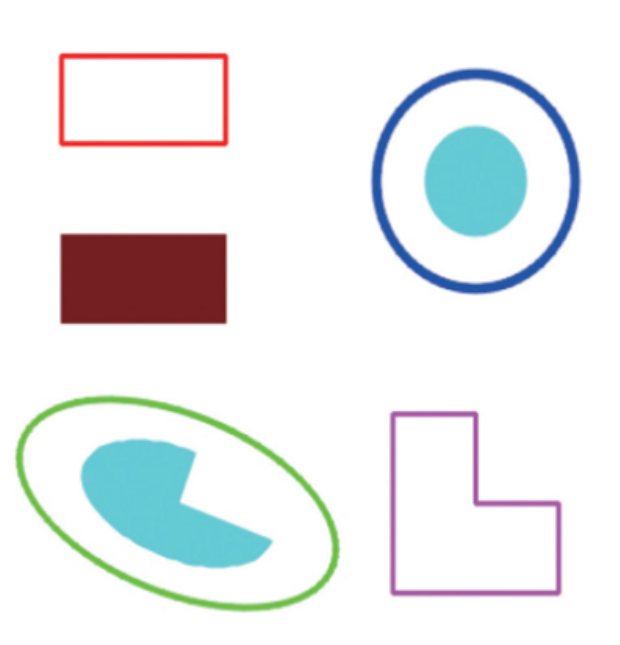

In [163]:
from IPython.display import Image
Image(filename='polygon.png', width=300)

In [165]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

pts1 = 50, 50
pts2 = 200, 100

pts3 = 50, 150
pts4 = 200, 200

pts5 = np.array([[300, 250], [350, 250], [350, 300], [400, 300], [400, 350], [300, 350]])

cx, cy = 150, 300
cx2, cy2 = 350, 100

size = 100, 50
size2 = 60, 30

cv2.rectangle(img, pts1, pts2, (0, 0, 255), 2)
cv2.rectangle(img, pts3, pts4, (0, 0, 50), -1)
cv2.ellipse(img, (cx, cy), size, 20, 0, 360, color=(0, 150, 0), thickness=2)
cv2.ellipse(img, (cx, cy), size2, 20, 0, 270, color=(235, 206, 135), thickness=-1)
cv2.circle(img, (cx2, cy2), 60, color=(139, 0, 0), thickness= 3)
cv2.circle(img, (cx2, cy2), 30, color=(235, 206, 135), thickness= -1)
cv2.polylines(img, [pts5], isClosed = True, color=(128, 0, 128), thickness=2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 문자열 출력

In [183]:
img = np.zeros((512, 512, 3), dtype = np.uint8) + 255

text = 'OpenCV Programming'
org = (50, 100)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, text, org, font, 1, (255, 0, 0), 2)

size, baseline = cv2.getTextSize(text, font, 1, 2)

cv2.rectangle(img, org, (org[0] + size[0], org[1] - size[1]), (0, 0, 255))
cv2.circle(img, org, 3, (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 실습 : 카운트다운 영상 만들기

In [193]:
size2 = 300
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
fps = 1
out = cv2.VideoWriter('./out/countdown.mp4', fourcc, fps, (512, 512))

for i in range(5, -1, -1):
    img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 
    cx, cy = img.shape[0] // 2, img.shape[1] // 2
    text = str(i)
    font = cv2.FONT_HERSHEY_COMPLEX
    size, baseline = cv2.getTextSize(text, font, 8, 5)
    
    org = cx-(size[0]//2), cy+(size[1]//2)
    cv2.putText(img, text, org, font, 8, (0, 0, 0), 5)

    cv2.circle(img, (cx, cy), size2, (0, 255, 255), 5)
    size2 -= 40
    cv2.imshow('img', img)
    out.write(img)
    cv2.waitKey(1000)
    
cv2.waitKey(1000)
out.release()
cv2.destroyAllWindows()


In [192]:
import numpy as np
import cv2

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
cx, cy = img.shape[0]//2, img.shape[1]//2
fontFace = cv2.FONT_HERSHEY_TRIPLEX
fontScale=5

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 1
frame_size = (img.shape[0], img.shape[1])
out = cv2.VideoWriter('./out/countdown.mp4', fourcc, fps, frame_size)

# 카운트다운
for count in range(5, 0, -1):
    text = str(count)
    size, baseLine = cv2.getTextSize(text, fontFace, fontScale, 2)
    org = cx - size[0]//2, cy + size[1]//2
    cv2.putText(img, text, org, fontFace, fontScale, (255, 0, 0), 3)
    cv2.circle(img, (cx, cy), int(np.max(size)*count*0.5), (255, 255, 0), 4)
    cv2.imshow('img', img)
    out.write(img)
    cv2.waitKey(1000)
    img=np.zeros(shape=(512, 512, 3), dtype=np.uint8) + 255
    
cv2.destroyAllWindows()
out.release()